# forecast 패키지 로드!

In [1]:
# R 내장 데이터 AirPassengers
AirPassengers

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [2]:
# time-series 데이터인지 확인 함수 : is.ts(df)
is.ts(AirPassengers)

[1] TRUE

In [3]:
# 데아터 클래스 확인 함수 : class(df)
class(AirPassengers)

[1] "ts"

In [4]:
# time 주기 파악 함수 : frequency(df)
frequency(AirPassengers)

# 12 => 월별 데이터

[1] 12

In [7]:
# 시계열 데이터로 변환 ts(df)
airline.ts<-ts(AirPassengers)

In [8]:
# ts(df) 는 디폴트로 frequency를 1로 간주함
frequency(airline.ts)

[1] 1

In [11]:
# 특정 연도부터 월별로 time-series 데이터로 만들기
airline.ts<-ts(AirPassengers, start=c(1949,1), frequency = 12)

# 시작 time 조회해보기
start(airline.ts)

# 끝 time 조회해보기
end(airline.ts)

# 주기 확인
frequency(airline.ts)

[1] 1949    1

[1] 1960   12

[1] 12

In [12]:
# 시계열 자료 직접 생성
oil_enter_in_R<-c(8047,7173,8156,6527,6364,6169,6273,6256,6498,7329,8057,9494)

In [13]:
is.ts(oil_enter_in_R)

[1] FALSE

In [14]:
class(oil_enter_in_R)

[1] "numeric"

In [17]:
# 벡터를 데이터프레임으로 만들기
oil_df<-data.frame(oil_enter_in_R)
# 시계열 데이터로 전환
oil_ts<-ts(oil_df, start=c(1994,1), frequency = 12)
is.ts(oil_ts)

[1] TRUE

In [18]:
# csv파일로 저장
write.csv(oil_ts, "oil_ts.csv")

In [19]:
# csv파일 읽기
a<-read.csv("oil_ts.csv")

In [20]:
#  ts형태에서 csv파일로 저장후 다시 읽을 때는 dataframe형태로 전환되어 있음..!
is.ts(a)

[1] FALSE

In [21]:
# csv파일로 저장될 때 따로 날짜가 저장되지 않기 때문에 따로 써주어야함
# 날짜 따로 만들어주기
date<-seq(as.Date('1994/1/1'), by='month', length.out=12)
date

[1] "1994-01-01" "1994-02-01" "1994-03-01" "1994-04-01" "1994-05-01"
 [6] "1994-06-01" "1994-07-01" "1994-08-01" "1994-09-01" "1994-10-01"
[11] "1994-11-01" "1994-12-01"

In [22]:
# 기존 df과 날짜 결합해 새로운 df만들어주기
oil_ts<-data.frame(date,oil_ts)
oil_ts

date,oil_enter_in_R
1994-01-01,8047
1994-02-01,7173
1994-03-01,8156
1994-04-01,6527
1994-05-01,6364
1994-06-01,6169
1994-07-01,6273
1994-08-01,6256
1994-09-01,6498
1994-10-01,7329


In [25]:
# 다시 저장                      # row.names = T하면 index 생겨서 저장됨
write.csv(oil_ts, "oil_ts.csv", row.names= F)

In [26]:
setwd('C:/Users/joyh1/Desktop/빅데이터_20-1/R_data')

In [27]:
unemploy.df<-read.csv("BOK_unemployment_rate.csv")
oil.df<-read.csv("BOK_energy_oil.csv")
exchange.df<-read.csv("BOK_exchange_rate_krw_usd.csv")

In [30]:
class(unemploy.df)
class(oil.df)
class(exchange.df)

[1] "data.frame"

[1] "data.frame"

[1] "data.frame"

In [34]:
unemploy.ts<-ts(unemploy.df, start=c(2000,1), frequency = 1)
oil.ts<-ts(oil.df, start=c(1994,1), frequency = 12)
exchange.ts<-ts(exchange.df, start=c(1980,1), frequency = 4)

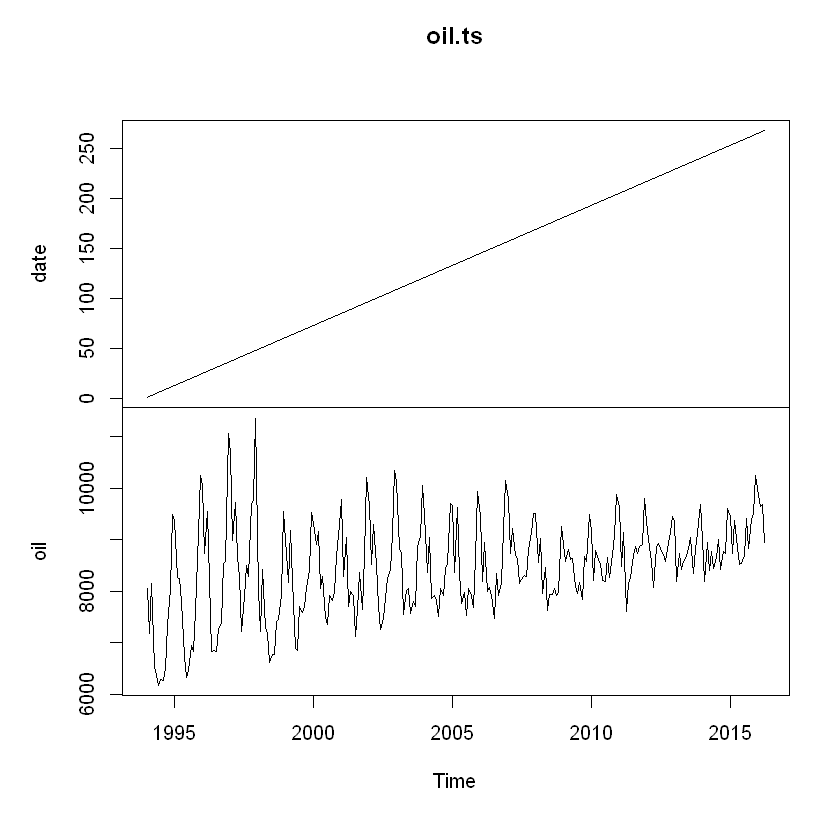

In [35]:
plot(oil.ts)

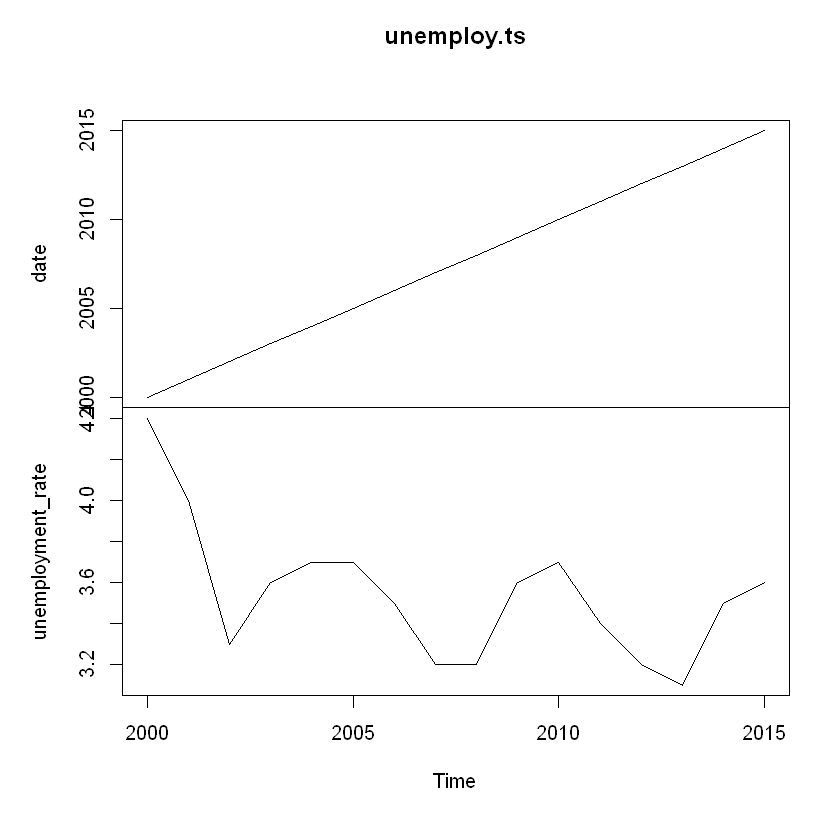

In [36]:
plot(unemploy.ts)

In [38]:
library(quantmod)

Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


In [39]:
getSymbols("FB", src='yahoo', from=as.Date('2015-08-01'), to=as.Date('2018-08-31'))
getSymbols("TWTR", src='yahoo', from=as.Date('2015-08-01'), to=as.Date('2018-08-31'))

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "FB"

[1] "TWTR"

In [40]:
FB

           FB.Open FB.High FB.Low FB.Close FB.Volume FB.Adjusted
2015-08-03   93.53   95.08  92.80    94.14  29343100       94.14
2015-08-04   93.79   94.73  93.33    94.06  20136000       94.06
2015-08-05   95.25   97.09  95.18    96.44  29813200       96.44
2015-08-06   97.18   98.74  94.42    95.12  42271300       95.12
2015-08-07   95.38   95.40  93.61    94.30  23199100       94.30
2015-08-10   95.68   95.90  93.63    94.15  21624200       94.15
2015-08-11   93.73   94.76  92.90    93.62  22491000       93.62
2015-08-12   92.70   94.44  91.19    94.19  27050500       94.19
2015-08-13   94.05   94.73  93.35    93.43  17451800       93.43
2015-08-14   93.54   94.72  93.21    94.42  15929700       94.42
2015-08-17   94.42   94.46  93.39    93.93  18313500       93.93
2015-08-18   94.08   95.85  94.04    95.17  22278800       95.17
2015-08-19   94.63   96.10  94.16    95.31  23251300       95.31
2015-08-20   93.54   94.77  90.46    90.56  44598200       90.56
2015-08-21   87.52   89.1

In [41]:
TWTR

           TWTR.Open TWTR.High TWTR.Low TWTR.Close TWTR.Volume TWTR.Adjusted
2015-08-03     30.85     31.09    28.69      29.27    46637100         29.27
2015-08-04     29.11     29.90    28.90      29.34    21900300         29.34
2015-08-05     29.41     29.50    28.43      28.48    21223300         28.48
2015-08-06     28.40     28.43    27.23      27.54    27612200         27.54
2015-08-07     27.80     27.90    26.87      27.04    18392600         27.04
2015-08-10     28.09     29.63    27.82      29.50    42547100         29.50
2015-08-11     29.01     29.89    28.53      29.62    27827600         29.62
2015-08-12     29.11     29.50    28.51      29.39    18513100         29.39
2015-08-13     29.60     29.60    28.44      28.54    15004000         28.54
2015-08-14     28.50     29.27    28.45      29.06    16716300         29.06
2015-08-17     29.19     29.34    28.93      29.06     9557300         29.06
2015-08-18     28.91     29.00    28.30      28.30     9662800         28.30

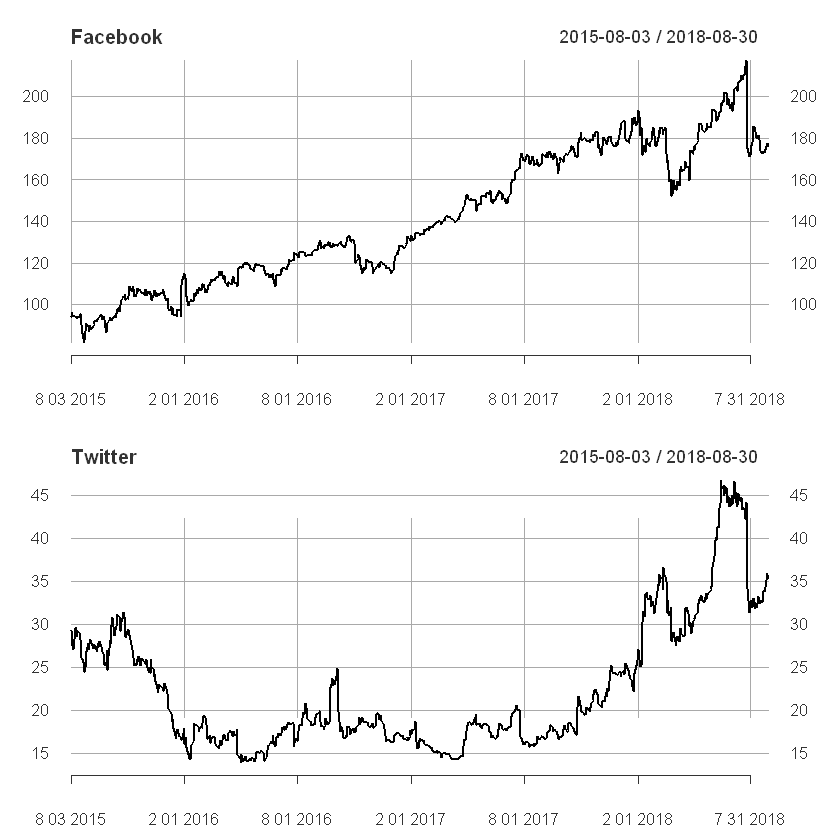

In [46]:
par(mfrow=c(2,1))
plot(FB$FB.Adjusted, xlab='Time(Daily)', ylab='Adjusted price', main='Facebook')
plot(TWTR$TWTR.Adjusted, xlab='Time(Daily)', ylab='Adjusted price', main='Twitter')

In [47]:
class(FB)
class(TWTR)

[1] "xts" "zoo"

[1] "xts" "zoo"

In [56]:
# 분기별 자료로 집계 ( function = 합계 사용)
air_quarterly<-aggregate(AirPassengers, nfrequency = 4, FUN=sum)
air_quarterly

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Qtr1,Qtr2,Qtr3,Qtr4
1949,362,385,432,341
1950,382,409,498,387
1951,473,513,582,474
1952,544,582,681,557
1953,628,707,773,592
1954,627,725,854,661
1955,742,854,1023,789
1956,878,1005,1173,883
1957,972,1125,1336,988
1958,1020,1146,1400,1006


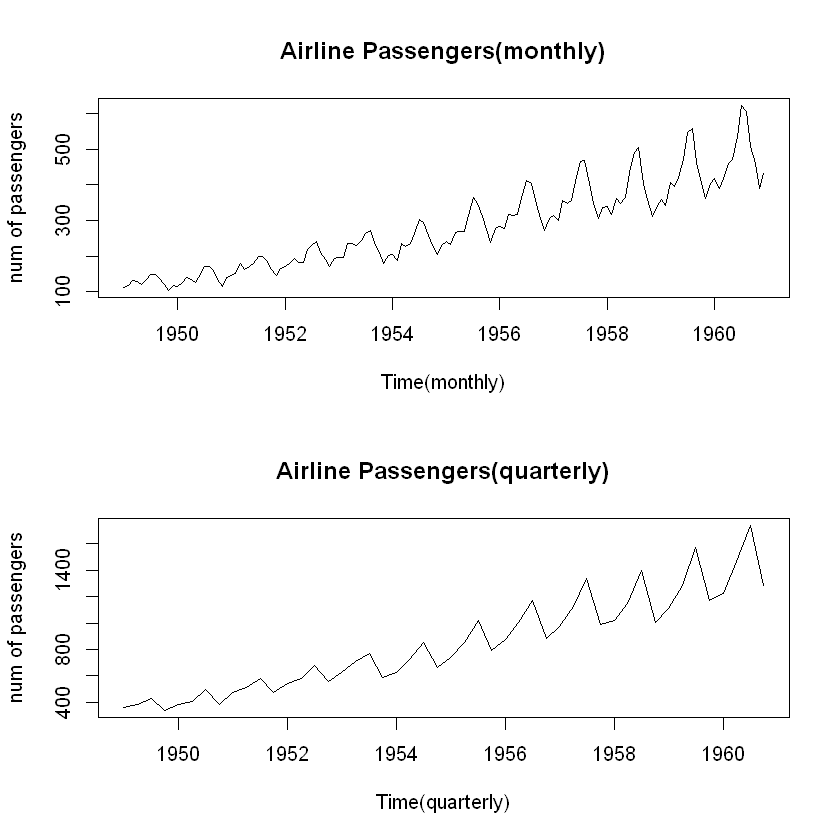

In [59]:
par(mfrow=c(2,1))
plot(AirPassengers, xlab='Time(monthly)', ylab='num of passengers', main='Airline Passengers(monthly)')
plot(air_quarterly, xlab='Time(quarterly)', ylab='num of passengers', main='Airline Passengers(quarterly)')

#  aggregate함수로 집계하기

- aggregate(ts_data, nfrequency=12, FUN=mean)
    * nfrequency = 1(연도), 4(분기), 12(월별)
    * FUN = 어떻게 집계할지 함수(eg. mean, sum 등등)

In [60]:
# 평균으로 해보기
air_quarterly_mean<-aggregate(AirPassengers, nfrequency = 4, FUN=mean)
air_quarterly_mean

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Qtr1,Qtr2,Qtr3,Qtr4
1949,120.6667,128.3333,144.0000,113.6667
1950,127.3333,136.3333,166.0000,129.0000
1951,157.6667,171.0000,194.0000,158.0000
1952,181.3333,194.0000,227.0000,185.6667
1953,209.3333,235.6667,257.6667,197.3333
1954,209.0000,241.6667,284.6667,220.3333
1955,247.3333,284.6667,341.0000,263.0000
1956,292.6667,335.0000,391.0000,294.3333
1957,324.0000,375.0000,445.3333,329.3333
1958,340.0000,382.0000,466.6667,335.3333


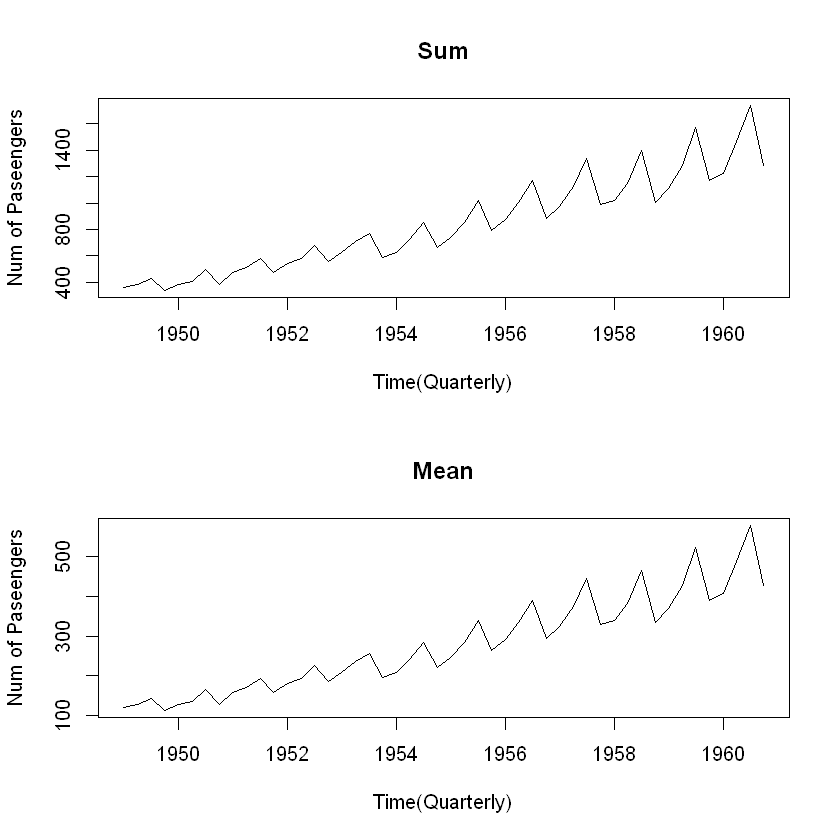

In [62]:
par(mfrow=c(2,1))
plot(air_quarterly, xlab='Time(Quarterly)', ylab='Num of Paseengers', main='Sum')
plot(air_quarterly_mean, xlab='Time(Quarterly)', ylab='Num of Paseengers', main='Mean')

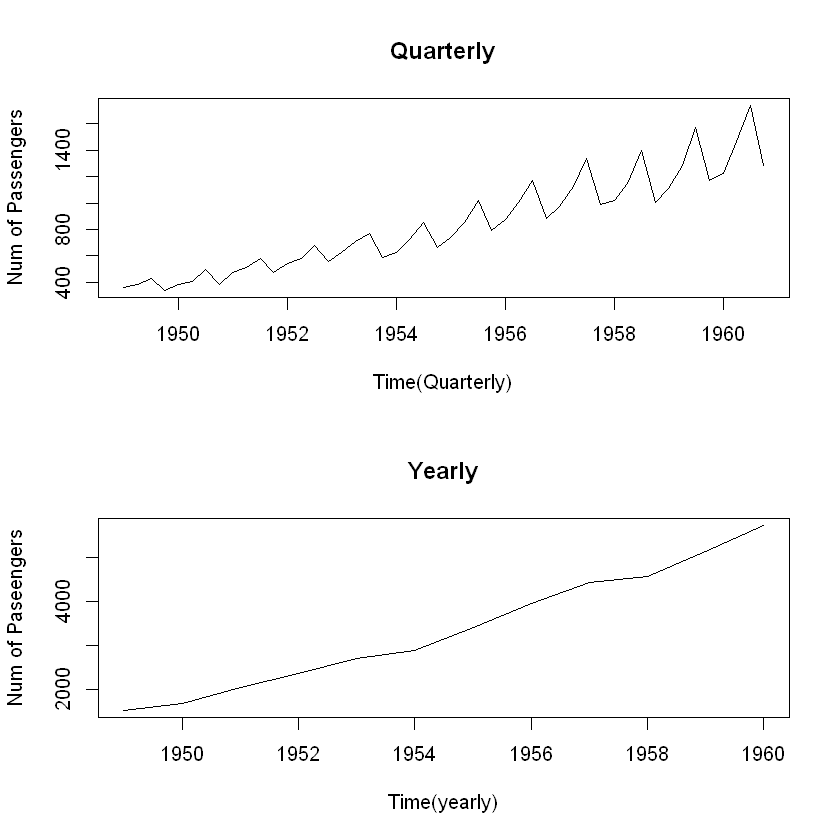

In [64]:
# 연도별로 합계로 집계하기
air_yearly<-aggregate(AirPassengers, nfrequency = 1, FUN=sum)
par(mfrow=c(2,1))
plot(air_quarterly, xlab='Time(Quarterly)', ylab='Num of Passengers', main='Quarterly')
plot(air_yearly, xlab='Time(yearly)', ylab='Num of Paseengers', main='Yearly')

In [1]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [1]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
# 단순지수평활법
air_fit<-ses(AirPassengers, alpha=0.2, initial='simple')
air_fit

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       469.6301 408.5579 530.7022 376.2283 563.0319
Feb 1961       469.6301 407.3485 531.9117 374.3786 564.8816
Mar 1961       469.6301 406.1621 533.0981 372.5641 566.6961
Apr 1961       469.6301 404.9974 534.2628 370.7829 568.4773
May 1961       469.6301 403.8534 535.4068 369.0333 570.2269
Jun 1961       469.6301 402.7289 536.5313 367.3136 571.9466
Jul 1961       469.6301 401.6230 537.6372 365.6223 573.6379
Aug 1961       469.6301 400.5348 538.7253 363.9580 575.3022
Sep 1961       469.6301 399.4635 539.7967 362.3196 576.9406
Oct 1961       469.6301 398.4083 540.8518 360.7058 578.5544

In [3]:
names(air_fit)

[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "residuals" "method"    "series"

In [3]:
air_fit$model

Simple exponential smoothing 

Call:
 ses(y = AirPassengers, initial = "simple", alpha = 0.2) 

  Smoothing parameters:
    alpha = 0.2 

  Initial states:
    l = 112 

  sigma:  47.6549

In [4]:
air_fit$fitted

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112.0000,112.0000,113.2000,116.9600,119.3680,119.6944,122.7555,127.8044,131.8435,132.6748,129.9399,124.7519
1950,123.4015,121.7212,122.5770,126.2616,128.0093,127.4074,131.7259,139.3807,145.5046,148.0037,145.0029,138.8024
1951,139.0419,140.2335,142.1868,149.3494,152.0796,156.0636,160.4509,168.1607,174.3286,176.2629,173.4103,167.9282
1952,167.5426,168.2341,170.5873,175.0698,176.2558,177.6047,185.6837,194.5470,204.0376,205.0301,202.2241,196.1792
1953,195.7434,195.7947,195.8358,203.8686,210.0949,213.8759,219.7007,228.5606,237.2485,237.1988,231.9590,221.5672
1954,217.4538,214.7630,209.4104,214.5283,217.0227,220.4181,229.1345,243.7076,253.5661,254.6529,249.5223,240.2178
1955,237.9743,238.7794,237.6235,243.4988,248.5991,252.8792,265.3034,285.0427,297.4342,300.3473,295.0779,283.4623
1956,282.3698,282.6959,281.5567,288.6454,293.5163,298.4130,313.5304,333.4243,347.7395,349.1916,340.5533,326.6426
1957,322.5141,321.0113,317.0090,324.8072,329.4458,334.5566,352.0453,374.6362,393.1090,395.2872,385.6298,369.5038
1958,362.8030,358.2424,350.1939,352.5552,351.6441,353.9153,370.1322,394.3058,416.4446,413.9557,402.9646,384.3717


In [5]:
names(air_fit)

[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "residuals" "method"    "series"

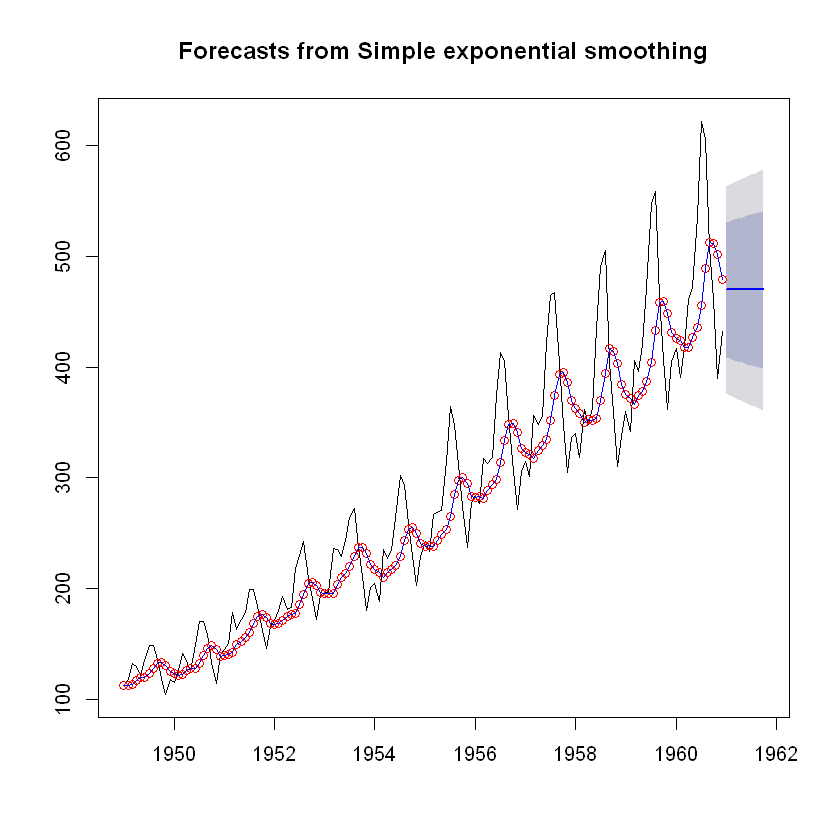

In [6]:
plot(air_fit)
# 밑의 두개 라인 똑같은 표현임
lines(air_fit$fitted, col='red', type='o')
lines(fitted(air_fit), col='blue')

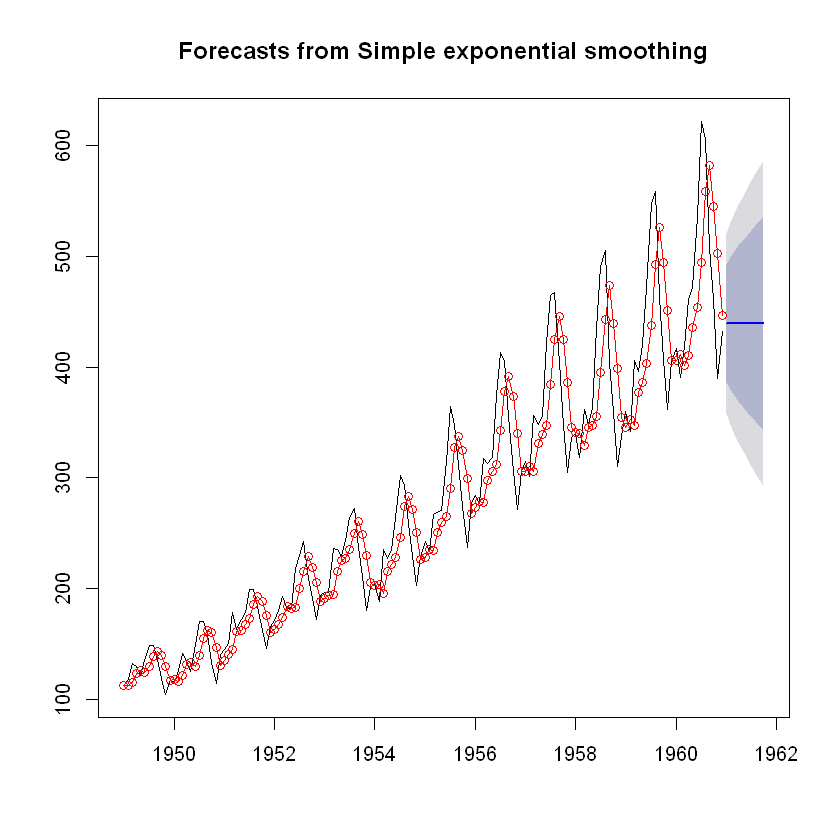

In [7]:
air_fit2<-ses(AirPassengers, alpha=0.5, initial='simple')
plot(air_fit2)
lines(fitted(air_fit2), col='red', type='o')

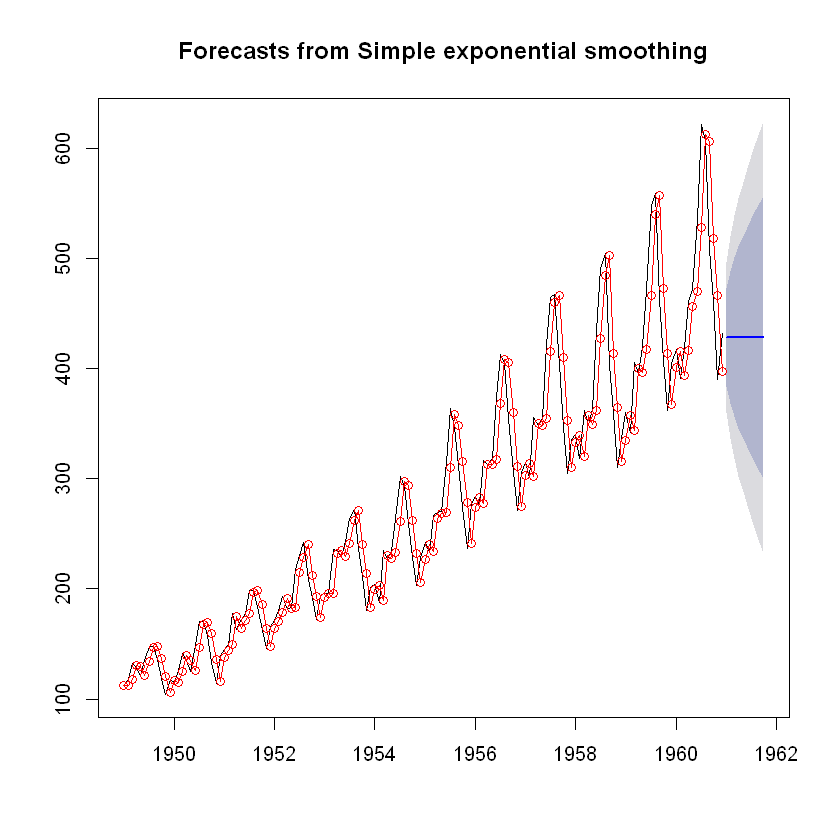

In [8]:
air_fit3<-ses(AirPassengers, alpha=0.9, initial='simple')
plot(air_fit3)
lines(air_fit3$fitted, col='red',type='o')

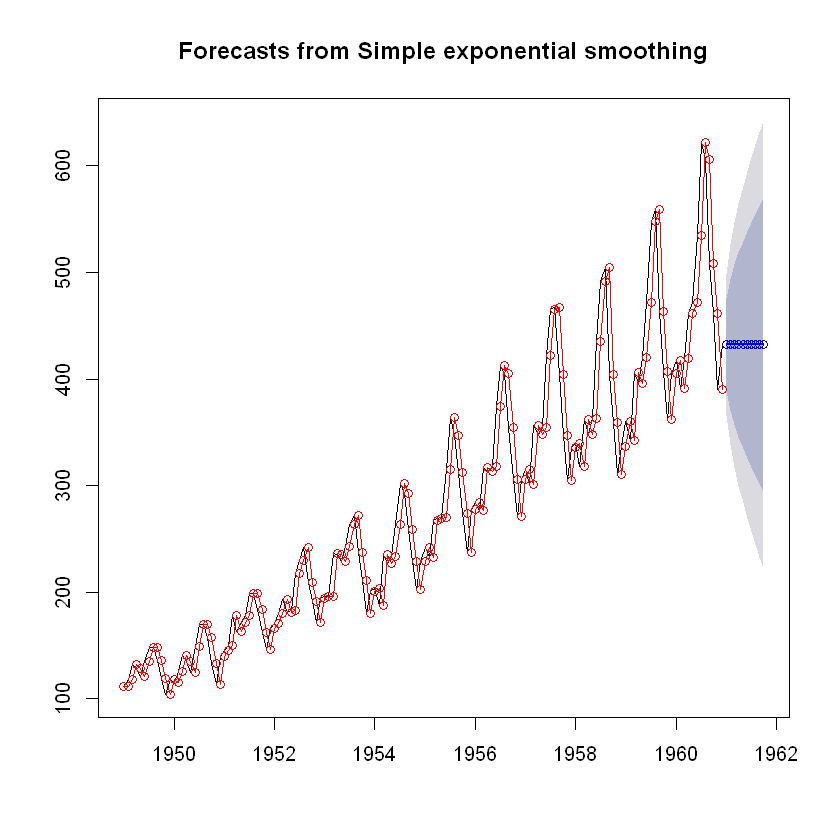

In [10]:
air_fit4<-ses(AirPassengers, initial='optimal')
plot(air_fit4)
lines(air_fit4$fitted, col='red', type='o')
lines(air_fit4$mean, col='blue', type='o')

In [11]:
air_fit4$mean

ERROR while rich displaying an object: Error in arr_partition(a, rows, cols): rows >= 2L is not TRUE

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. rep

In [21]:
# alpha=0.2일때 -> RMSE : 47.65
summary(air_fit)
# aplha=0.5일때 -> RMSE : 41.59
summary(air_fit2) 
# alpha=0.9일때  -> RMSE : 34.73
summary(air_fit3)
# optimal일때    -> RMSE : 33.59
summary(air_fit4)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = AirPassengers, initial = "simple", alpha = 0.2) 

  Smoothing parameters:
    alpha = 0.2 

  Initial states:
    l = 112 

  sigma:  47.6549
Error measures:
                   ME     RMSE      MAE      MPE     MAPE     MASE      ACF1
Training set 12.41771 47.65485 34.37562 3.101443 11.49087 1.073222 0.6882958

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       469.6301 408.5579 530.7022 376.2283 563.0319
Feb 1961       469.6301 407.3485 531.9117 374.3786 564.8816
Mar 1961       469.6301 406.1621 533.0981 372.5641 566.6961
Apr 1961       469.6301 404.9974 534.2628 370.7829 568.4773
May 1961       469.6301 403.8534 535.4068 369.0333 570.2269
Jun 1961       469.6301 402.7289 536.5313 367.3136 571.9466
Jul 1961       469.6301 401.6230 537.6372 365.6223 573.6379
Aug 1961       469.6301 400.5348 538.7253 363.9580 575.3022
Sep 1961       469.6301

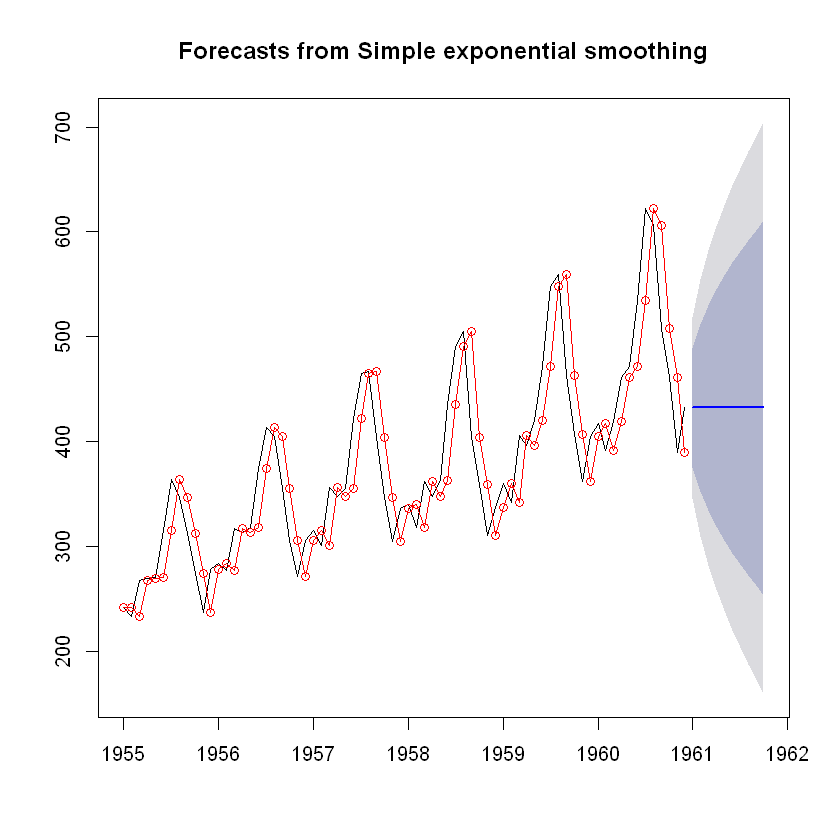

In [22]:
# 1955년도부터 데이터만 활용
air_ts<-window(AirPassengers, start=1955)
air_fit5<-ses(air_ts, initial='optimal')
plot(air_fit5)
lines(air_fit5$fitted, col='red', type='o')

# ses(단순지수평활법) 함수 사용법

- ses(ts_data, alpha=0.2, initial='simple')
    * alpha : 평활상수값(가중평균=최근의 자료들에 대해 더 많은 가중값을 부여)
        * 0~1사이의 값
        * 1에 가까울수록 RMSE의 값이 더작아짐으로써 예측정확성이 높아짐
    * initial : 'simple'을 넣어주면 초기값을 관찰값들 중 가장 첫 번째값으로 넣어줌
        * 'optimal'을 넣어주면 최적의 값을 알아서 찾아줌. 이 때 optimal로 하게되면 alpha값도 알아서 최적의 값을 찾아주기 때문에 따로 alpha값 인자로 넣어줄 필요 없음

- ses 함수 적용한 시계열 데이터의 변수명들 각 의미
    * model : 기본적으로 ses함수가 적용된 모델에 대한 내용(alpha값, initial값, sigma값에 대한 정보)
    * fitted : ses함수 적용전의 시계열 데이터를 fitting한 후의 시계열 데이터
    * mean : 예측값을 나타내주는듯..! 근데 밑에서 mean값출력하려는데 왜 에러가뜰까..?

In [13]:
# why error~!?!?!?!?
air_fit4$mean

ERROR while rich displaying an object: Error in arr_partition(a, rows, cols): rows >= 2L is not TRUE

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. rep